In [1]:
# Import Libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define Path

path = r'C:\Users\dolson\OneDrive - BEACON TECHNOLOGIES\Desktop\Instacart Basket Analysis 10.2022'

In [3]:
# Import latest version of merged dataset

df_final_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))

In [4]:
df_final_data.head()

order_id  user_id  order_number  order_day_of_week  order_hour_of_day  \
0   2539329        1             1                  2                  8   
1   2398795        1             2                  3                  7   
2    473747        1             3                  3                 12   
3   2254736        1             4                  4                  7   
4    431534        1             5                  4                 15   

   days_since_prior_order  new_customer  product_id  add_to_cart_order  \
0                     NaN          True       196.0                  1   
1                    15.0         False       196.0                  1   
2                    21.0         False       196.0                  1   
3                    29.0         False       196.0                  1   
4                    28.0         False       196.0                  1   

   reordered  ...         Frequency_flag  first_name  last_name  gender  \
0          0  ...  Non-frequent customer       Linda     Nguyen  Female   
1          1  ...  Non-frequent customer       Linda     Nguyen  Female   
2          1  ...  Non-frequent customer       Linda     Nguyen  Female   
3          1  ...  Non-frequent customer       Linda     Nguyen  Female   
4          1  ...  Non-frequent customer       Linda     Nguyen  Female   

     state age date_joined  no_of_dependants marital_status  income  
0  Alabama  31   2/17/2019                 3        married   40423  
1  Alabama  31   2/17/2019                 3        married   40423  
2  Alabama  31   2/17/2019                 3        married   40423  
3  Alabama  31   2/17/2019                 3        married   40423  
4  Alabama  31   2/17/2019                 3        married   40423  

[5 rows x 32 columns]

In [5]:
df_final_data.shape

(32404859, 32)

# Create a bar chart, histogram, scatterplot, and line chart using a sample subset for the line chart

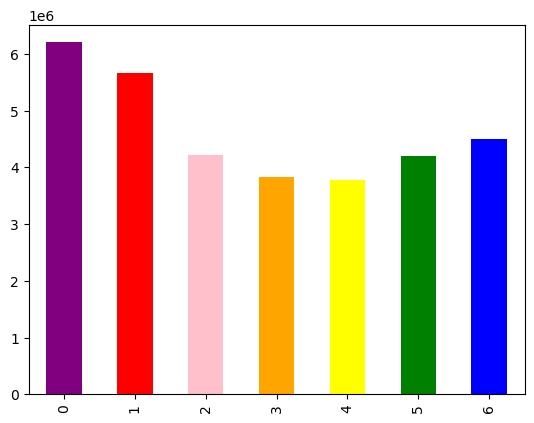

In [8]:
# Create Bar Chart order(s)_day_of_week column

bar = df_final_data['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink','orange','yellow','green', 'blue'])

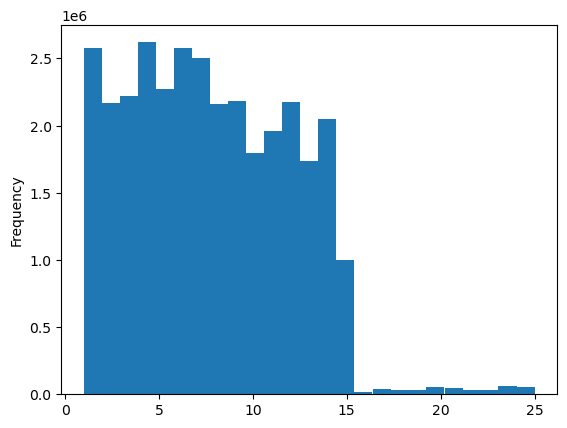

In [9]:
# Create Historgrams & Scatterplots 
# Use prices column
hist = df_final_data['prices'].plot.hist(bins = 25)

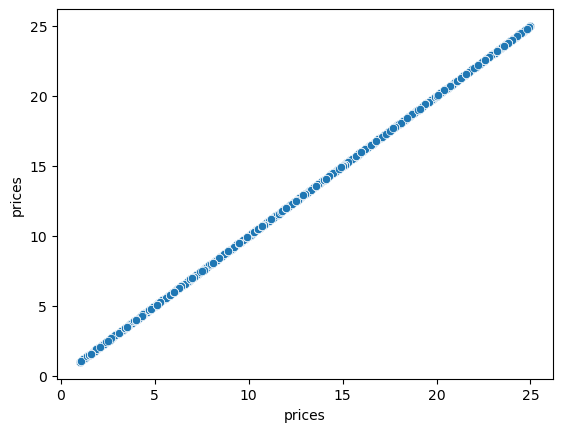

In [10]:
# Create a scatter plot
splot = sns.scatterplot(x = 'prices', y = 'prices',data = df_final_data)

In [11]:
# Create line chart with 
#define the sub set of the df for the line chart (plotting the top 1 million)
# creating a random sampling
np.random.seed(4)

In [12]:
dev = np.random.rand(len(df_final_data)) <= 0.7

In [13]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [14]:
# split the dataframe(70% of sample in dataframe)
big = df_final_data[dev]

In [15]:
# split dataframe (30% of sample in the dataframe)
small = df_final_data[~dev]

In [16]:
df_final_data.shape

(32404859, 32)

In [17]:
# Check if row size correct - Yes it is 
len(big)+len(small)

32404859

In [18]:
# Create dataframe with only columns needed for line chart
df_small = small[['order_day_of_week','prices']]

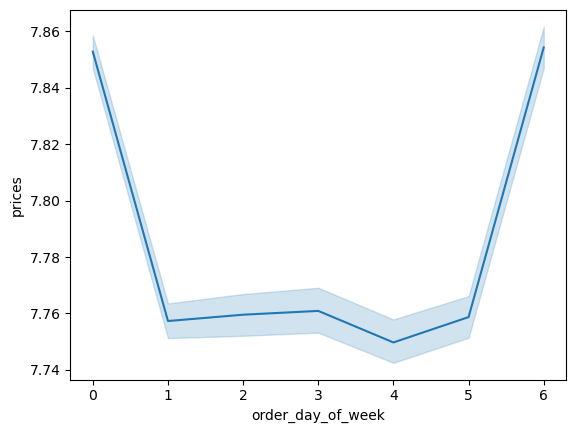

In [19]:
# Create line chart on 30% of df sample
line = sns.lineplot(data = df_small, x = 'order_day_of_week',y = 'prices')

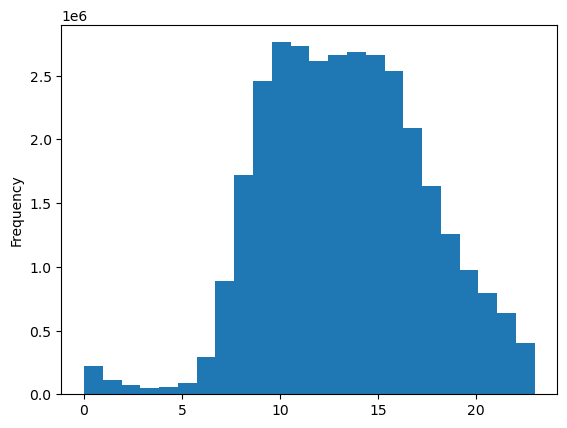

In [20]:
# You need to provide the Instacart senior stakeholders with descriptive findings about sales. 
# Create a histogram of the “order_hour_of_day” column.

hist_2 = df_final_data['order_hour_of_day'].plot.hist(bins = 24)


In [21]:
# Check accuracy of historgram

df_final_data['order_hour_of_day'].value_counts(dropna=False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

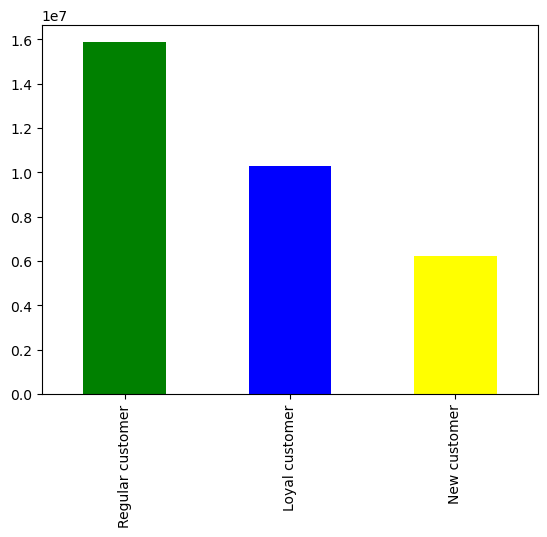

In [22]:
# The marketing team is curious about the distribution of orders among 
#customers in terms of loyalty. 
# Create a bar chart from the “loyalty_flag” column.

bar_2 = df_final_data['loyalty_flag'].value_counts().plot.bar(color =  ['green', 'blue', 'yellow'])


In [23]:
# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
# (Hint: To check this, you need to use an accurate sample for your line chart!)

df_small_2 = small[['order_hour_of_day','prices']]

In [24]:
df_small_2

order_hour_of_day     prices
0                         8   9.000000
2                        12   9.000000
3                         7   9.000000
6                         9   9.000000
10                        8  12.500000
...                     ...        ...
32404841                 12  10.703125
32404842                  3  10.703125
32404843                  1  10.703125
32404849                 18  10.703125
32404850                 20  10.703125

[9721098 rows x 2 columns]

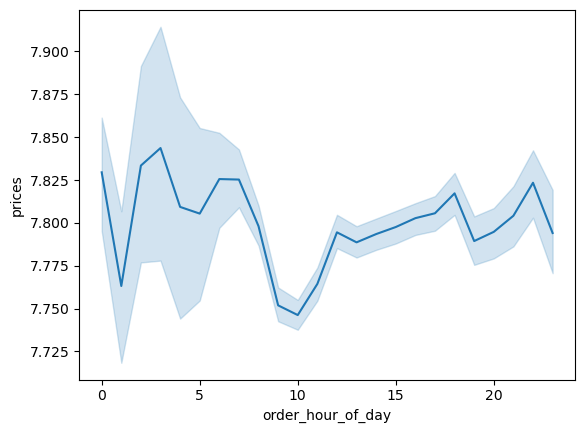

In [25]:
# Create line chart on 30% of df sample

line_2 = sns.lineplot(data = df_small_2, x = 'order_hour_of_day',y = 'prices')

In [26]:
# More spending is done in morning 

In [27]:
# Determine whether there’s a connection between age and family situation 
# create a line chart exploring the connections 
# between age and number of dependents:
# New data frame with columns needed for the line chart

df_small_3 = small[['age','no_of_dependants']]

In [28]:
df_small_3

age  no_of_dependants
0          31                 3
2          31                 3
3          31                 3
6          31                 3
10         31                 3
...       ...               ...
32404841   25                 0
32404842   25                 0
32404843   25                 0
32404849   25                 0
32404850   25                 0

[9721098 rows x 2 columns]

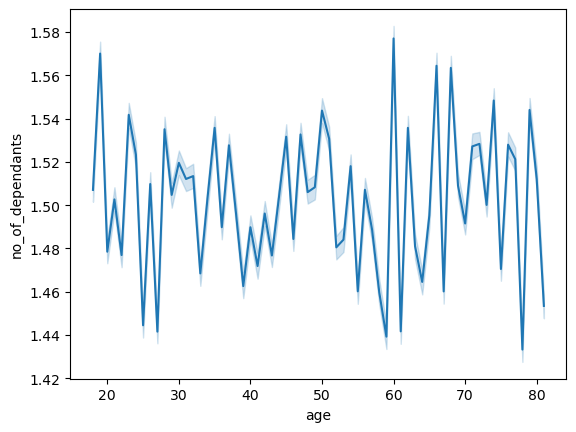

In [29]:
line_3 = sns.lineplot(data = df_small_3, x = 'age',y = 'no_of_dependants')

In [30]:
df_small_3['no_of_dependants'].describe()

count    9.721098e+06
mean     1.502105e+00
std      1.118703e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: no_of_dependants, dtype: float64

In [31]:
# No clear trends between age and no. of dependants

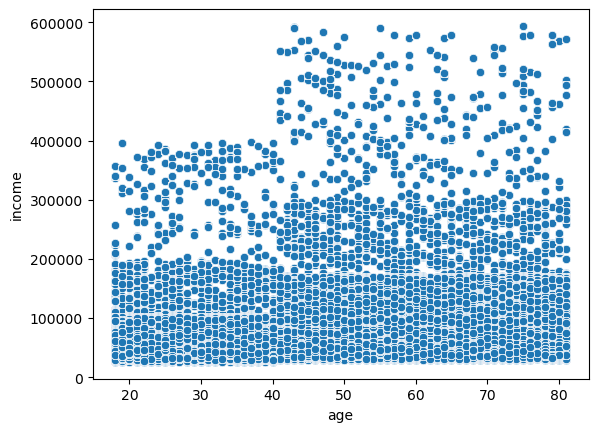

In [32]:
# You’ll also need to explore whether there’s a connection between 
# age and spending power (income).

splot_2 = sns.scatterplot(x = 'age', y = 'income', data = df_final_data)

In [33]:
# Scatterplot shows relationship between age and spending
# power. 
# 1. Customers age 20-40 have income of ,< = 200k
# 2. Age 40+ are earning more income > 200k
# 3. 40+ age group has higer spending power


# Export visualizations 

In [34]:
# Export bar object outside of Jupyter via figure.savefig() function
# will be in Visualization folder 

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

In [35]:
# Export hist object outside of Jupyter via figure.savefig() function
# will be in Visualization folder 

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [36]:
# Export splot object outside of Jupyter via figure.savefig() function
# will be in Visualization folder 

splot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'splot_prices.png'))

In [37]:
# Export line object outside of Jupyter via figure.savefig() function
# will be in Visualization folder 

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_dow_prices.png'))

In [38]:
# Export bar_2 = 'loyalty_flag'

bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [39]:
# Export hist_2 object outside of Jupyter via figure.savefig() function
# will be in Visualization folder 

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_2_order_hour_of_day.png'))

In [40]:
# Export Line_2 
#line_2 = sns.lineplot(data = df_small2, x = 'order_hour_of_day',y = 'prices')

line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour_of_day_prices.png'))

In [43]:
# Export splot_2 

splot_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income.png'))